# Explore the in detail MLP using pytorch 

Let’s dive into how a Multilayer Perceptron (MLP) can be implemented in PyTorch, step by step, explaining every single component.

An MLP is a type of feedforward artificial neural network, typically used for supervised learning tasks like classification and regression. The architecture consists of:

Input Layer: Receives input data.
Hidden Layers: Intermediate layers with neurons that learn patterns.
Output Layer: Produces the final result.
Now, let's walk through the implementation and explain every part:

1. Import Necessary Libraries

import torch  # PyTorch core library for tensors and computations
import torch.nn as nn  # Provides the modules to build neural networks
import torch.optim as optim  # Optimization library (for SGD, Adam, etc.)
import torch.nn.functional as F  # Contains functions like activation functions
torch: The core of PyTorch for tensors and operations.
torch.nn: Provides layers and modules to define neural networks.
torch.optim: Provides optimizers to adjust weights during training.
torch.nn.functional: Contains functions like activation functions, loss functions, etc.
2. Define the MLP Model

class MLP(nn.Module):  # Inheriting from nn.Module to define the architecture
    def __init__(self):
        super(MLP, self).__init__()
        
        # Input layer to first hidden layer
        self.fc1 = nn.Linear(28 * 28, 256)  # Fully connected layer: input = 784, output = 256
        
        # First hidden layer to second hidden layer
        self.fc2 = nn.Linear(256, 128)  # Fully connected layer: input = 256, output = 128
        
        # Second hidden layer to output layer
        self.fc3 = nn.Linear(128, 10)  # Fully connected layer: input = 128, output = 10 (for 10 classes)
        
    def forward(self, x):
        # Forward pass of the network
        
        # Flatten the input image (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28*28)
        
        # Apply first hidden layer, followed by ReLU activation
        x = F.relu(self.fc1(x))
        
        # Apply second hidden layer, followed by ReLU activation
        x = F.relu(self.fc2(x))
        
        # Apply output layer (no activation needed as we will use softmax later)
        x = self.fc3(x)
        
        return x
Explanation:
Class Declaration (MLP):

The MLP class inherits from nn.Module. This is standard practice when building models in PyTorch.
Constructor (__init__):

super(MLP, self).__init__() ensures the base class nn.Module is properly initialized.

Layers:

self.fc1 = nn.Linear(28 * 28, 256): Defines a fully connected layer that takes the input (flattened 28x28 image = 784 units) and outputs 256 units.
self.fc2 = nn.Linear(256, 128): The second fully connected layer takes the 256 units from the first layer and outputs 128 units.
self.fc3 = nn.Linear(128, 10): The final fully connected layer outputs 10 units (for the 10 classes, like digits 0-9).
Forward Pass:

view(-1, 28 * 28): Flattens the input image from a shape (batch_size, 1, 28, 28) to (batch_size, 784), which is necessary for the fully connected layers.
ReLU Activation: Rectified Linear Unit (ReLU) is a non-linear activation function applied after each hidden layer. ReLU introduces non-linearity into the model.
The output layer doesn’t apply an activation function because we typically apply softmax during the loss calculation (which is done outside the model, like during the training step with CrossEntropyLoss).
3. Initialize the Model
python
Copy code
model = MLP()  # Create an instance of the MLP model
This initializes the model by calling the MLP class constructor.
4. Define Loss Function and Optimizer
python
Copy code
criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer
CrossEntropyLoss: Used for multi-class classification. It combines LogSoftmax and NLLLoss in a single function, making it suitable for classification tasks.
Optimizer (SGD): Stochastic Gradient Descent is used to update the weights of the model based on the gradients of the loss. Here, we use a learning rate of 0.01.
5. Training Loop

num_epochs = 5  # Define the number of epochs

for epoch in range(num_epochs):
    running_loss = 0.0  # Keep track of the loss
    
    for images, labels in train_loader:  # Iterate over the data from the dataloader
        
        # Zero the gradients (reset for each batch)
        optimizer.zero_grad()
        
        # Forward pass: compute predictions
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute gradients
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Accumulate the loss
        running_loss += loss.item()
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader)}')
Explanation:
Epochs: Define how many times the model will go through the entire dataset.

Dataloader:

The train_loader is an iterator that provides batches of images and labels from the dataset.
Zero Gradients:

optimizer.zero_grad(): Before each batch, gradients are reset to avoid accumulation.
Forward Pass:

outputs = model(images): The input images are passed through the network to get the predicted output.
Loss Calculation:

loss = criterion(outputs, labels): The difference between predicted and actual labels is computed using the loss function.
Backward Pass:

loss.backward(): This computes the gradients of the loss with respect to the model parameters (i.e., backpropagation).
Update Weights:

optimizer.step(): Updates the model's weights based on the computed gradients.
Tracking Loss:

The loss is accumulated to keep track of the model's performance during training.
6. Evaluating the Model
Once the model is trained, it needs to be evaluated on a test set to see how well it generalizes:


model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for images, labels in test_loader:
        outputs = model(images)
        
        # Get the class with the highest predicted probability
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')
model.eval(): Switches the model to evaluation mode, disabling features like dropout and batch normalization that behave differently during training.
No Gradients: Since gradients are not needed during evaluation, torch.no_grad() is used to prevent computing and storing them, saving memory and computation.
Accuracy Calculation: We compare the predicted and actual labels to compute the model's accuracy.
Key Concepts Recap:
MLP: A basic form of neural network with multiple fully connected layers.
ReLU Activation: A non-linear activation function to introduce non-linearity.
CrossEntropyLoss: Used for classification tasks.
SGD Optimizer: Updates the weights using stochastic gradient descent.
Training Loop: Responsible for forward pass, loss calculation, backpropagation, and updating weights.
This is a basic MLP example, which you can modify and extend (e.g., adding more layers, using different activation functions, or changing the optimizer).

# Different loss functions 

In deep learning, loss functions (also called cost functions or objective functions) are used to measure how well the model's predictions match the actual labels. The goal during training is to minimize the loss function by updating the model's weights. Different types of loss functions are used depending on the type of problem (classification, regression, etc.).

Let's explore the most common loss functions used in PyTorch, particularly for Multilayer Perceptron (MLP) models, and explain each one in detail.

1. Cross-Entropy Loss (nn.CrossEntropyLoss)
Use Case: Multi-class classification (e.g., MNIST digit classification).


Explanation:

Cross-entropy loss is widely used for classification problems where the output layer uses softmax activation. It measures the distance between the true labels and the predicted probability distribution.
The loss is minimized when the predicted probability for the correct class is close to 1.
Example:

python
Copy code
criterion = nn.CrossEntropyLoss()
loss = criterion(outputs, labels)  # outputs are raw logits, labels are the true class indices
outputs: These are raw logits from the network (no need to apply softmax).
labels: True labels as class indices (not one-hot encoded).
2. Mean Squared Error (MSE) Loss (nn.MSELoss)
Use Case: Regression tasks or measuring differences between continuous values.


Explanation:

MSE Loss computes the square of the difference between the predicted value and the true value. It’s commonly used for regression problems, where the output is continuous (e.g., predicting house prices).
The loss is high when the difference between predicted and true values is large, and it is minimized when the model's predictions are close to the actual values.
Example:

python
Copy code
criterion = nn.MSELoss()
loss = criterion(predictions, true_values)  # predictions and true_values are both continuous
3. Negative Log-Likelihood Loss (nn.NLLLoss)
Use Case: Multi-class classification, but when using log-softmax as an activation function.


Explanation:

NLLLoss is similar to cross-entropy, but it expects log-probabilities as inputs rather than raw logits.
Typically, log_softmax is applied in the model’s output layer, and then NLLLoss is used to compute the loss.
Example:

python
Copy code
criterion = nn.NLLLoss()
loss = criterion(F.log_softmax(outputs, dim=1), labels)  # outputs passed through log_softmax
Difference from Cross-Entropy:

In CrossEntropyLoss, softmax is applied internally, and it directly works with logits. NLLLoss requires the user to manually apply log-softmax.
4. Binary Cross-Entropy Loss (nn.BCELoss)
Use Case: Binary classification (e.g., spam/not spam).


Explanation:

Binary Cross-Entropy Loss is used for binary classification tasks, where the model is predicting a probability (output is between 0 and 1).
It penalizes the model more when it predicts the wrong probability for the true class.
Example:

python
Copy code
criterion = nn.BCELoss()
loss = criterion(predicted_probs, labels)  # predicted_probs are probabilities between 0 and 1
For binary classification tasks, the network's output layer typically uses sigmoid activation to produce probabilities between 0 and 1.

5. Binary Cross-Entropy with Logits Loss (nn.BCEWithLogitsLoss)
Use Case: Binary classification (like BCELoss), but more numerically stable because it combines sigmoid and BCE in one function.


Explanation:

BCEWithLogitsLoss is a more numerically stable version of BCELoss. Instead of applying sigmoid activation manually, this loss function applies it internally, avoiding potential overflow or underflow issues when calculating probabilities.
Example:

python
Copy code
criterion = nn.BCEWithLogitsLoss()
loss = criterion(logits, labels)  # logits are raw outputs from the model (not passed through sigmoid)
6. Hinge Loss (SVM Loss, torch.nn.HingeEmbeddingLoss)
Use Case: Binary classification with Support Vector Machines (SVMs).


Explanation:

Hinge Loss is commonly used with SVMs. It tries to maximize the margin between two classes, penalizing samples that are not correctly classified with a margin of at least 1.
The loss is 0 if the predicted output 


 i is greater than 1 for the correct class. If the model’s predictions are on the wrong side of the decision boundary, it is penalized more.
Example:

python
Copy code
criterion = nn.HingeEmbeddingLoss()
loss = criterion(predictions, labels)  # labels should be -1 or 1
7. Smooth L1 Loss (nn.SmoothL1Loss)
Use Case: Regression tasks where outliers are possible but should not affect the model too much.


​
 
Explanation:

Smooth L1 Loss (also called Huber Loss) combines the best aspects of L1 Loss (mean absolute error) and L2 Loss (mean squared error). It behaves like L2 Loss for small differences but switches to L1 Loss for large differences, making it more robust to outliers.
This loss function is widely used in tasks like object detection (e.g., bounding box regression).
Example:

python
Copy code
criterion = nn.SmoothL1Loss()
loss = criterion(predicted, true_values)  # predicted and true_values are continuous
8. L1 Loss (Mean Absolute Error, nn.L1Loss)
Use Case: Regression tasks, especially when you want to minimize the sum of absolute differences.


Explanation:

L1 Loss measures the absolute differences between predicted and actual values. Unlike MSE, it is less sensitive to large errors, which makes it more robust to outliers.
Example:

python
Copy code
criterion = nn.L1Loss()
loss = criterion(predictions, true_values)  # predictions and true_values are continuous
Summary of Use Cases:
Classification:
Multi-class: CrossEntropyLoss, NLLLoss
Binary: BCELoss, BCEWithLogitsLoss
Regression:
Continuous values: MSELoss, L1Loss, SmoothL1Loss
Robust to Outliers: SmoothL1Loss, L1Loss
Choosing the correct loss function depends on the nature of the problem (classification or regression), the type of outputs (binary, multi-class, continuous), and how sensitive you want your model to be to outliers.

# Activation functions 
ChatGPT said:
ChatGPT
Activation functions are a critical component of neural networks, including Multilayer Perceptrons (MLPs), as they introduce non-linearity into the model. Without activation functions, neural networks would behave as simple linear models, unable to solve complex problems like image classification, speech recognition, etc.

Let's explore various activation functions in detail:

1. Sigmoid Activation Function

Range: (0, 1)

Properties:

Non-linear: Introduces non-linearity to the model, allowing it to capture complex patterns.
Output: The output is a probability-like value between 0 and 1.

The derivative is used in backpropagation for gradient calculation.

Use Case:

Sigmoid is used in binary classification tasks (typically in the output layer) where the goal is to produce a probability that a sample belongs to class 1.
Pros: Smooth, non-linear, maps input to a probability range.
Cons: Susceptible to vanishing gradient problem; gradients diminish for inputs far from 0, slowing down learning for deep networks.
Example:

python
Copy code
import torch
import torch.nn as nn

sigmoid = nn.Sigmoid()
output = sigmoid(torch.tensor([1.0, 2.0, 3.0]))
print(output)
2. Tanh (Hyperbolic Tangent) Activation Function

Range: (-1, 1)

Properties:

Non-linear: Maps input values to the range (-1, 1), making it zero-centered.

The derivative is used for gradient calculation during backpropagation.

Use Case:

Tanh is often used in hidden layers of neural networks because it outputs values between -1 and 1, which are more centered around 0 compared to sigmoid, making optimization easier.
Pros: Zero-centered, which means activations can be positive or negative. Reduces the likelihood of neurons getting "stuck."
Cons: Still suffers from the vanishing gradient problem, though less than the sigmoid.
Example:

python
Copy code
tanh = nn.Tanh()
output = tanh(torch.tensor([1.0, 2.0, 3.0]))
print(output)
3. ReLU (Rectified Linear Unit)
Properties:

Non-linear: Introduces non-linearity by zeroing out negative values, which helps the network capture complex patterns.

The derivative is straightforward, allowing efficient gradient calculation.

Use Case:

ReLU is widely used in the hidden layers of deep networks due to its simplicity and efficiency. It helps to mitigate the vanishing gradient problem that affects sigmoid and tanh.
Pros: Computationally efficient, sparse activations (outputs 0 for all negative values), mitigates vanishing gradients, speeds up convergence.
Cons: Can suffer from the dying ReLU problem, where neurons can "die" if they get stuck outputting 0 for all inputs (e.g., if weights are updated in such a way that they always produce negative values).
Example:

python
Copy code
relu = nn.ReLU()
output = relu(torch.tensor([1.0, -2.0, 3.0]))
print(output)
4. Leaky ReLU

Range: (-∞, ∞)

Properties:

Non-linear: Similar to ReLU but allows a small, non-zero gradient for negative inputs, which helps avoid the dying ReLU problem.

Leaky ReLU allows some negative values to flow through, reducing the chance of dead neurons.
Use Case:

Used in deep networks to mitigate the issues with ReLU while maintaining the advantages of sparse activations and efficient computations.
Pros: Prevents neurons from "dying," addresses ReLU's downside of having zero gradients for negative values.
Cons: The performance gain over standard ReLU might not always be significant, depending on the problem.
Example:

python
Copy code
leaky_relu = nn.LeakyReLU(0.01)
output = leaky_relu(torch.tensor([1.0, -2.0, 3.0]))
print(output)
5. ELU (Exponential Linear Unit)

Range: (-α, ∞)

Properties:

Non-linear: Similar to Leaky ReLU, but for negative inputs, it decays exponentially.

Use Case:

ELU is used to speed up learning and increase the robustness to noisy data. It's an improvement over ReLU by introducing an exponential curve for negative values, which helps the network to capture variations in negative inputs.
Pros: Avoids dead neurons, allows small negative values, improves convergence in some cases.
Cons: Slightly more computationally expensive than ReLU.
Example:

python
Copy code
elu = nn.ELU()
output = elu(torch.tensor([1.0, -2.0, 3.0]))
print(output)
6. Softmax Activation Function

Range: (0, 1), outputs sum to 1.

Properties:

Non-linear: Turns raw logits (output values) into a probability distribution.
Derivative: The derivative of the softmax function is complex, involving the softmax values of all outputs.
Use Case:

Softmax is commonly used in the output layer for multi-class classification problems. It converts the raw output logits into probabilities, where the sum of the probabilities across all classes is 1.
Pros: Converts logits to probabilities, useful for classification.
Cons: Can cause vanishing gradients when dealing with large-scale or imbalanced classification tasks.
Example:

python
Copy code
softmax = nn.Softmax(dim=1)
output = softmax(torch.tensor([[1.0, 2.0, 3.0]]))  # Example with 3 classes
print(output)
7. Swish Activation Function
 
Range: (-∞, ∞)

Properties:

Non-linear: Swish is a smooth, non-monotonic function that tends to work well in deep networks.
Derivative: A more complex derivative than ReLU, combining sigmoid and the input.
Use Case:

Swish is a recent activation function, introduced by Google. It is found to work better than ReLU in some deeper networks (e.g., ResNet, EfficientNet).
Pros: Smooth, avoids the problems of sharp zero gradients like in ReLU. It has been shown to improve performance in some architectures.
Cons: Computationally more expensive than ReLU.
Example:

python
Copy code
swish = nn.SiLU()  # SiLU (Sigmoid Linear Unit) is another name for Swish
output = swish(torch.tensor([1.0, 2.0, -1.0]))
print(output)
Choosing Activation Functions
Hidden Layers: Typically, ReLU or its variants (Leaky ReLU, ELU) are used because of their computational efficiency and ability to reduce vanishing gradients.
Output Layers:
Binary Classification: Sigmoid.
Multi-class Classification: Softmax.
Regression: Linear activation or no activation (i.e., identity).
Understanding the behavior and trade-offs of different activation functions is crucial in designing effective neural network architectures. Each function has its strengths, weaknesses, and specific use cases, depending on the problem domain and network depth.

# Optimizers 

Optimizers are algorithms or methods used to update the weights of neural networks in order to minimize the loss function. The goal of optimization is to find the optimal set of weights that make the model perform as well as possible on a given task, such as classification or regression.

There are several optimizers available in deep learning, each with its own advantages and disadvantages. Here’s a detailed explanation of each optimizer and its inner workings.

1. Gradient Descent (GD)
Gradient Descent is the most basic optimization algorithm. It minimizes the loss function by adjusting the model's weights in the direction of the steepest descent of the gradient of the loss.

Types of Gradient Descent:

Batch Gradient Descent:

Computes the gradient using the entire dataset.
Pros: Converges to the global minimum.
Cons: Computationally expensive for large datasets.
Stochastic Gradient Descent (SGD):

Computes the gradient using one sample at a time.
Pros: Faster for large datasets.
Cons: More noisy updates, may not converge to the global minimum.
Mini-batch Gradient Descent:

Computes the gradient using small batches of data.
Pros: Combines the advantages of both batch and stochastic gradient descent.
Cons: Still needs tuning for batch size and learning rate.
Example:

python
Copy code
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
2. Momentum
Momentum is a variant of SGD that accumulates the past gradients to accelerate the learning process. It helps to overcome the oscillations in the optimization path.

Properties:

Pros: Helps accelerate gradients in the right direction and reduces oscillations.
Cons: Still sensitive to the learning rate.
Example:

python
Copy code
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
3. Nesterov Accelerated Gradient (NAG)
NAG is an improvement over Momentum, which looks ahead of the current gradient by using the updated velocity to compute the next gradient.


Properties:

Pros: NAG reduces overshooting compared to Momentum, giving a more precise update.
Cons: Can be more complex to implement and tune.
Example:

python
Copy code
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
4. Adagrad (Adaptive Gradient Algorithm)
Adagrad adjusts the learning rate for each parameter individually, based on how frequently they are updated. Parameters that are updated more frequently will have smaller learning rates, while those updated less frequently will have larger learning rates.


Properties:

Pros: Works well for sparse data and adjusts learning rates automatically.
Cons: The learning rate keeps decaying, which can cause the model to stop learning after a while.
Example:

python
Copy code
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
5. RMSprop (Root Mean Square Propagation)
RMSprop was developed to address Adagrad’s problem of monotonically decreasing learning rates. It uses a moving average of squared gradients to normalize the gradient.


Properties:

Pros: Works well for non-stationary, noisy problems. Prevents the learning rate from decaying too much.
Cons: Requires tuning of the decay parameter 
𝛾
γ.
Example:

python
Copy code
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)
6. Adam (Adaptive Moment Estimation)
Adam is one of the most popular optimization algorithms today. It combines the benefits of Momentum and RMSprop by computing adaptive learning rates for each parameter, as well as incorporating momentum to store an exponentially decaying average of past gradients.


Properties:

Pros: Works well on a wide variety of tasks. Combines the advantages of both Momentum and RMSprop. Automatically adjusts learning rates for each parameter.
Cons: Can be sensitive to hyperparameter choices.
Example:

python
Copy code
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
7. AdamW
AdamW is a variant of Adam that includes weight decay (L2 regularization). Unlike the standard Adam optimizer, AdamW decouples weight decay from the gradient update, which is shown to improve generalization.

Update Rule: Similar to Adam, but the weight decay is handled separately:


Properties:

Pros: Better generalization in many cases compared to Adam, since weight decay is decoupled from the gradient update.
Cons: Requires proper tuning of weight decay.
Example:

python
Copy code
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
8. AdaMax
AdaMax is a variant of Adam that uses the infinity norm for regularizing the learning rate.


Properties:

Pros: More stable and performs better in certain cases compared to Adam.
Cons: Still not as widely used as Adam, may require careful tuning.
Example:

python
Copy code
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002)
9. Nadam
Nadam is an extension of Adam that incorporates Nesterov momentum.

Update Rule: Nadam adds a momentum term like NAG into the Adam update rule.

Properties:

Pros: Combines the advantages of Adam with Nesterov momentum, potentially leading to better convergence.
Cons: Can be more computationally expensive due to Nesterov momentum.
Example:

python
Copy code
optimizer = torch.optim.Nadam(model.parameters(), lr=0.002)

# Different layer linear
ChatGPT said:
ChatGPT
In deep learning, different types of layers are used to build neural networks, each serving a specific purpose. Let's go over some of the most common layers such as Linear, MaxPooling, Dropout, and others, explaining each in detail.

1. Linear (Fully Connected) Layer
A Linear layer (also called a Dense layer in Keras/TensorFlow) is the most basic type of neural network layer. It applies a linear transformation to the input.


Functionality:

The linear layer connects every neuron in the current layer to every neuron in the next layer. It learns the weight matrix 
𝑊
W and the bias 
𝑏
b during training, making it a powerful feature extractor.
Use Cases:

Commonly used in fully connected neural networks (e.g., the final layers of a CNN, where the extracted features are used for classification).
Example in PyTorch:

python
Copy code
import torch.nn as nn
linear_layer = nn.Linear(in_features=128, out_features=64)  # Input size: 128, Output size: 64
2. Convolutional Layer (Conv Layer)
A Convolutional Layer is typically used in Convolutional Neural Networks (CNNs) to process grid-like data, such as images. Instead of connecting all neurons, the conv layer uses filters (kernels) to slide over the input, detecting features like edges, textures, and patterns.


Functionality:

Detects spatial hierarchies in data.
The learned filters capture features such as edges, shapes, and eventually objects at different layers.
Use Cases:

Primarily used in image recognition tasks, object detection, and computer vision.
Example in PyTorch:

python
Copy code
conv_layer = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
3. MaxPooling Layer
A MaxPooling Layer is a type of down-sampling operation. It reduces the spatial dimensions (height and width) of the input by taking the maximum value over a defined window.

Functionality:

Reduces the size of the data, making the network computationally efficient.
Helps make features invariant to small translations (shifts) in the input.
MaxPooling Formula: If you have a 2x2 Max Pooling layer, it will slide over the input feature map in 2x2 blocks, taking the maximum value from each block.

Use Cases:

Applied after convolutional layers in CNNs to reduce spatial dimensions while retaining important features.
Example in PyTorch:

python
Copy code
maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
4. Dropout Layer
A Dropout Layer is a regularization technique that randomly "drops out" (sets to zero) some neurons during each training iteration. This prevents overfitting by forcing the model to learn more robust features that don’t depend on specific neurons.


Functionality:

Prevents over-reliance on specific neurons, encouraging the network to spread its learned features more broadly.
During training, randomly sets activations to zero; during inference, all neurons are used, but the weights are scaled by the dropout rate.
Use Cases:

Used to prevent overfitting in fully connected networks, especially in tasks where data is limited.
Example in PyTorch:

python
Copy code
dropout_layer = nn.Dropout(p=0.5)  # 50% dropout
5. ReLU Layer
The Rectified Linear Unit (ReLU) is an activation function that is applied element-wise. It returns the input if it’s positive and zero otherwise.


Functionality:

Introduces non-linearity into the model, which helps the network learn complex patterns.
Efficient and simple, ReLU is one of the most commonly used activation functions in neural networks.
Use Cases:

Widely used in hidden layers of CNNs, MLPs, and RNNs.
Example in PyTorch:

python
Copy code
relu_layer = nn.ReLU()
6. Batch Normalization Layer
The Batch Normalization Layer normalizes the inputs to each layer by adjusting and scaling the activations to have a mean of zero and a standard deviation of one.


Functionality:

Helps in faster convergence by standardizing inputs.
Reduces internal covariate shift, improving model generalization.
Use Cases:

Used after convolutional or linear layers to normalize inputs and stabilize training.
Example in PyTorch:

python
Copy code
bn_layer = nn.BatchNorm2d(num_features=32)
7. Flatten Layer
The Flatten Layer is used to convert multi-dimensional input into a one-dimensional vector. It is often used when transitioning from convolutional layers (which output multi-dimensional feature maps) to fully connected layers.

Functionality:

Reshapes the input to a one-dimensional tensor, so it can be fed into a dense (fully connected) layer.
Use Cases:

Used at the end of convolutional layers in CNNs to prepare the data for classification layers.
Example in PyTorch:

python
Copy code
x = torch.rand(32, 32, 3)  # Input shape: 32x32 image with 3 channels
flatten_layer = nn.Flatten()
flattened_output = flatten_layer(x)  # Output shape: 1D tensor
8. Activation Layer
An Activation Layer applies an activation function to the input data. The purpose of these layers is to introduce non-linearity to the network, allowing it to learn complex relationships.


Use Cases:

Applied after linear layers or convolutional layers to add non-linearity.
Example in PyTorch:

python
Copy code
activation_layer = nn.ReLU()
9. LSTM (Long Short-Term Memory) Layer
The LSTM Layer is used in recurrent neural networks (RNNs) to process sequential data by maintaining long-term dependencies through a memory cell.

Functionality:

Learns both short- and long-term dependencies in sequential data.
Useful in tasks where context matters, such as natural language processing, time series analysis, etc.
Use Cases:

Sequence prediction tasks like text generation, language translation, time-series forecasting, etc.
Example in PyTorch:

python
Copy code
lstm_layer = nn.LSTM(input_size=10, hidden_size=20, num_layers=2)
10. Embedding Layer
An Embedding Layer is used to convert categorical data (like words) into a dense vector representation, typically for NLP tasks.

Functionality:

It maps each input (e.g., a word in text) to a high-dimensional continuous vector.
Learns these embeddings during training.

# maxpooling , dropout etc explain in detail every singe things

Sure! Let’s explore MaxPooling, Dropout, and a few other common layers in detail.

1. MaxPooling Layer
Purpose: MaxPooling is primarily used in Convolutional Neural Networks (CNNs) to down-sample the input feature maps. It helps reduce the spatial dimensions of the data while preserving the most important features, which can lead to computational efficiency and reduced overfitting.

How It Works:

The MaxPooling layer operates on a window (or kernel) that slides over the input feature map.
For each position of the window, it takes the maximum value from the region covered by the window.

Stride: Number of pixels by which the window moves (default is equal to the kernel size).
Padding: Determines if the input should be padded (added borders) before applying the pooling operation (common options are 'valid' or 'same').
Example Use Case: In a CNN, MaxPooling layers are often used after convolutional layers to reduce the size of the output while retaining essential features. For example, if the output feature map from a convolutional layer is 

Example in PyTorch:

python
Copy code
import torch
import torch.nn as nn

maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
input_tensor = torch.randn(1, 1, 4, 4)  # Batch size: 1, Channels: 1, Height: 4, Width: 4
output_tensor = maxpool_layer(input_tensor)
2. Dropout Layer
Purpose: Dropout is a regularization technique used to prevent overfitting in neural networks by randomly dropping units (neurons) during training. This forces the network to learn more robust features that do not rely on any specific set of neurons.

How It Works:

During each training iteration, each neuron is kept with a probability 

During inference (testing), all neurons are used, but their outputs are scaled by the keep probability to maintain the expected sum of inputs.

Parameters:

Probability 
𝑝
p: The probability of keeping a neuron active during training (commonly set to 0.5).
Example Use Case: Dropout is typically used in fully connected layers of a neural network. For instance, after the output from a convolutional layer before the final classification layer, you might apply Dropout to reduce the risk of overfitting.

Example in PyTorch:

python
Copy code
dropout_layer = nn.Dropout(p=0.5)  # 50% dropout rate
input_tensor = torch.randn(1, 100)  # Example input
output_tensor = dropout_layer(input_tensor)
3. Average Pooling Layer
Purpose: Similar to MaxPooling, Average Pooling is used to down-sample feature maps. However, instead of taking the maximum value, it computes the average value within the window.

How It Works:

It slides a window over the input feature map and calculates the average of the values within the window.

Example Use Case: Average Pooling can be beneficial when the aim is to retain more information about the background of an image compared to MaxPooling.

Example in PyTorch:

python
Copy code
averagepool_layer = nn.AvgPool2d(kernel_size=2, stride=2)
output_tensor = averagepool_layer(input_tensor)
4. Global Average Pooling Layer
Purpose: Global Average Pooling replaces the traditional flattening operation by taking the average over the entire feature map. This significantly reduces the number of parameters and helps prevent overfitting.

How It Works:

Instead of using a kernel to sample regions, it computes the average of each feature map, resulting in a single value per feature map.

Example Use Case: Global Average Pooling is commonly used in the last layers of CNN architectures, especially in models like ResNet.

Example in PyTorch:

python
Copy code
global_avgpool_layer = nn.AdaptiveAvgPool2d(1)  # Output size of 1x1
output_tensor = global_avgpool_layer(input_tensor)
5. Flatten Layer
Purpose: The Flatten layer reshapes multi-dimensional inputs into a one-dimensional tensor. This is particularly useful when transitioning from convolutional layers (which output multi-dimensional feature maps) to fully connected layers.

How It Works:

It takes the input tensor and flattens it into a single vector.
Example Use Case: Commonly used after convolutional layers to prepare the output for classification.

Example in PyTorch:

python
Copy code
flatten_layer = nn.Flatten()
input_tensor = torch.randn(1, 32, 4, 4)  # Batch size: 1, Channels: 32, Height: 4, Width: 4
output_tensor = flatten_layer(input_tensor)  # Output shape will be (1, 32*4*4)
6. Batch Normalization Layer
Purpose: Batch Normalization normalizes the inputs of a layer by adjusting and scaling them. This helps stabilize and accelerate the training of deep neural networks by reducing internal covariate shift.

How It Works:

It normalizes the output of the previous layer by subtracting the batch mean and dividing by the batch standard deviation. Then, it applies a linear transformation to the normalized output.

Example Use Case: Commonly used in CNNs after convolutional layers and before activation layers.

Example in PyTorch:

python
Copy code
batchnorm_layer = nn.BatchNorm2d(num_features=32)  # For a feature map with 32 channels
output_tensor = batchnorm_layer(input_tensor)
Summary
MaxPooling reduces dimensionality by selecting the maximum value within a window, helping retain important features.
Dropout prevents overfitting by randomly dropping neurons during training.
Average Pooling computes the average value within a window, providing a softer down-sampling than MaxPooling.
Global Average Pooling reduces each feature map to a single value, which is efficient for the final layers of a network.
Flatten reshapes multi-dimensional tensors into one-dimensional vectors for fully connected layers.
Batch Normalization normalizes the output of layers to improve training stability and speed.
These layers can be combined in various ways to create powerful neural network architectures suitable for different tasks. Understanding their functionalities and appropriate use cases is essential for building effective models.








In [5]:
!pip install flatbuffers


In [7]:
# importing modules 
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 


In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# normalize image pixel values by dividing 
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale 


In [13]:
print("Feature matrix:", x_train.shape) 
print("Target matrix:", x_test.shape) 
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape) 


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


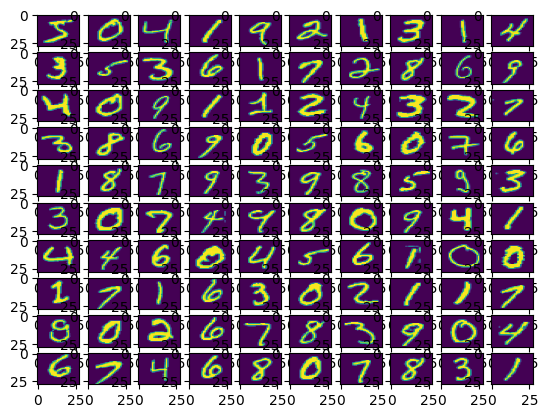

In [15]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
	for j in range(10): 
		ax[i][j].imshow(x_train[k].reshape(28, 28), 
						aspect='auto') 
		k += 1
plt.show() 


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([ 
    # Input layer
    Input(shape=(28, 28)), 
    
    # Flatten the input
    Flatten(), 
    
    # Dense layer 1
    Dense(256, activation='sigmoid'), 
    
    # Dense layer 2
    Dense(128, activation='sigmoid'), 
    
    # Output layer
    Dense(10, activation='sigmoid'), 
])


In [21]:
model.compile(optimizer='adam', 
			loss='sparse_categorical_crossentropy', 
			metrics=['accuracy']) 


In [23]:
model.fit(x_train, y_train, epochs=10, 
		batch_size=2000, 
		validation_split=0.2) 


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2111 - loss: 2.2933 - val_accuracy: 0.6204 - val_loss: 1.8177
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6792 - loss: 1.6507 - val_accuracy: 0.7956 - val_loss: 1.1320
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7937 - loss: 1.0386 - val_accuracy: 0.8531 - val_loss: 0.7364
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8501 - loss: 0.7082 - val_accuracy: 0.8823 - val_loss: 0.5412
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8759 - loss: 0.5382 - val_accuracy: 0.8973 - val_loss: 0.4386
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8929 - loss: 0.4412 - val_accuracy: 0.9061 - val_loss: 0.3795
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9033 - loss: 0.3851 - val_accuracy: 0.9117 - val_loss: 0.3419
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9064 - loss: 0.3534 - val_accuracy: 0.9158 - v

In [25]:
results = model.evaluate(x_test, y_test, verbose = 0) 
print('test loss, test acc:', results)


test loss, test acc: [0.2844732105731964, 0.9212999939918518]
